## Option A: Distributions

In order to see if the average speeds are materially the same in all weeks of September, I performed t-student test. And 
I tested the null hypothesis that the means are equal for pair of weeks. 

As results (p_values) show, only for week 2 and week 3 the null hypothesis with confidence 88% is correct. However,
for other pairs of weeks we reject the null hypothesis since the p_values are almost 0. Therefore, we conclude that speed is different in each week and it can be dependent of the week of the month.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("green_tripdata_2015-09.csv")

In [3]:
# ************ create speed varibale *******************
df_new = df.copy()
# converting the "lpep_pickup_datetime" and "Lpep_dropoff_datetime" to DateTime series
df_new.loc[:, "lpep_pickup_datetime"] = pd.to_datetime(df_new.loc[:, "lpep_pickup_datetime"])
df_new.loc[:, "Lpep_dropoff_datetime"] = pd.to_datetime(df_new.loc[:, "Lpep_dropoff_datetime"])
# Trip Duration in minutes
df_new.loc[:,'trip_duration'] = df_new.loc[:, "Lpep_dropoff_datetime"] - df_new.loc[:, "lpep_pickup_datetime"]
df_new.loc[:,'trip_duration'] = df_new.loc[:,'trip_duration'].dt.total_seconds()/60
# speed variable
df_new.loc[:,'speed_mph'] = df_new.Trip_distance/(df_new.trip_duration/60)
# remove transactions that speed in not in valid range
df_new = df_new[((df_new.speed_mph>0) & (df_new.speed_mph<=240))]
# week variable
df_new.loc[:,'week'] = df_new["lpep_pickup_datetime"].dt.week
j = 1
for i in range(36, 41):
    df_new['week'].replace(i, j, inplace=True)
    j = j+1
# hour varibale
df_new.loc[:,'hour'] = df_new["lpep_pickup_datetime"].dt.hour

# *********************** speed mean per week ***************
res = df_new[['speed_mph','week']].groupby('week').mean()
res.columns = ['speed_average']
print  res
# *********************** run t-test of pairs of weeks **********
p_values = []
weeks = df_new["week"].unique()
for i in weeks:
    for j in weeks:
        x = df_new[df_new.week==i].speed_mph
        y = df_new[df_new.week==j].speed_mph
        p = ttest_ind(x, y, False)
        p_values.append((i, j, p))
df_p_values = pd.DataFrame(p_values,columns=['w1','w2','(statistic, p_values)'])
print "\n******statistic, p-values******\n"
df_p_values

      speed_average
week               
1         13.544372
2         12.853491
3         12.855787
4         13.335422
5         12.667384

******statistic, p-values******



,w1,w2,"(statistic, p_values)"
0,1,1,"(0.0, 1.0)"
1,1,2,"(39.8323206601, 0.0)"
2,1,3,"(40.1850384325, 0.0)"
3,1,4,"(11.8466318799, 2.25801146566e-32)"
4,1,5,"(37.9202329795, 0.0)"
5,2,1,"(-39.8323206601, 0.0)"
6,2,2,"(0.0, 1.0)"
7,2,3,"(-0.14214919032, 0.88696220452)"
8,2,4,"(-28.981354722, 1.45873910445e-184)"
9,2,5,"(8.37975316934, 5.31765468368e-17)"


###  Speed as a function of time of day
I used the boxplots to see how the speed changes hourly. As the plot describes, speed is faster in the early morning and 
gets slower in the peak time around (3:00 pm - 7:00 pm).

Also, I used one-way anova test to see what's the impact of hour on speed. The p-value of zero proves that 
the speed of all hours are significantly different. Therefore, speed is a function of time of day.

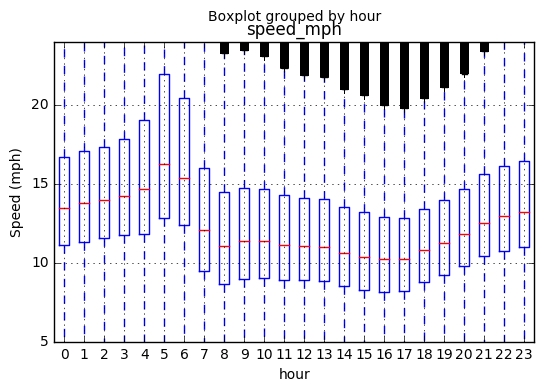

In [4]:
# boxplot
df_new.boxplot('speed_mph','hour')
plt.ylim([5,24]) # remove outliers
plt.ylabel('Speed (mph)')
plt.show()

In [5]:
# calculate anova

archive = [df_new[df_new.hour==i].speed_mph.tolist() for i in range(0,24)]
print f_oneway(*archive)


F_onewayResult(statistic=3556.0245124931162, pvalue=0.0)
